In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
! ls *

tree_scaling.csv  Untitled.ipynb  weak_scaling_graph.png


In [13]:
data = pd.read_csv('tree_scaling.csv')

In [14]:
uniform = data[data['type'] == 'uniform']
adaptive = data[data['type'] == 'adaptive']

In [15]:
uniform

,type,k,n_procs,time
0,uniform,2,1,1.775002
1,uniform,2,2,2.004818
2,uniform,2,4,2.157087
3,uniform,2,8,4.262258


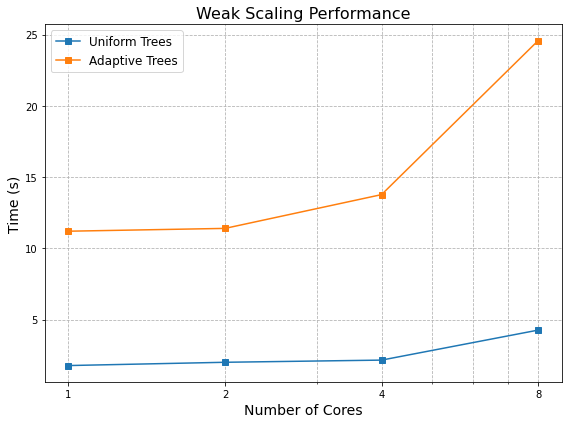

In [16]:
# Dummy data
cores = np.array([1,2,4,8])
# ideal_time = np.full(cores.shape, 10)  # Assume an ideal time of 10 seconds for any core count
observed_time_uniform = uniform['time']  # Just dummy data for illustration; time slightly increases with core count
observed_time_adaptive = adaptive['time']

# Start plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data
# ax.plot(cores, ideal_time, 'o-', label='Ideal Time')
ax.plot(cores, observed_time_uniform, 's-', label='Uniform Trees')
ax.plot(cores, observed_time_adaptive, 's-', label='Adaptive Trees')

# Set the axis labels and title
ax.set_xlabel('Number of Cores', fontsize=14)
ax.set_ylabel('Time (s)', fontsize=14)
ax.set_title('Weak Scaling Performance', fontsize=16)

# Log scale for x-axis can often be appropriate for scaling plots
ax.set_xscale('log')
ax.set_xticks(cores)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.get_xaxis().set_minor_formatter(plt.NullFormatter())  # Removes the minor tick labels 

# Grid, legend, and tight layout can help in clarity
ax.grid(True, which="both", ls="--", c='0.7')
ax.legend(fontsize=12)
plt.tight_layout()

# Save the figure in high resolution
plt.savefig("weak_scaling_graph.png", dpi=300)

# Display the plot
plt.show()


In [20]:
single = data[data['type'] == 'single']
exafmm = data[data['type'] == 'single_exafmm']

In [21]:
single

,type,k,n_procs,time
8,single,2,1,1.880335
9,single,2,2,3.180236
10,single,2,4,6.397213
11,single,2,8,13.231070


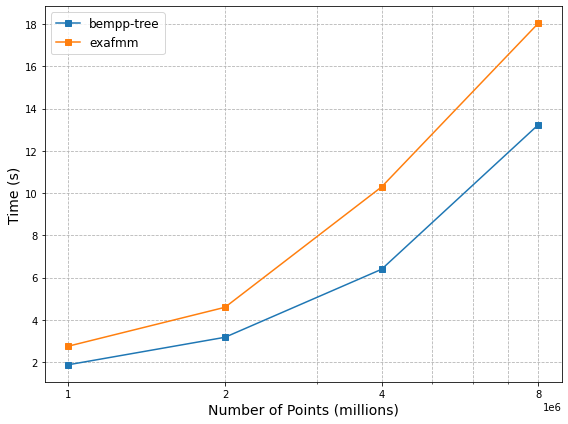

In [42]:
# Start plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data
npoints = [1000000, 2000000, 4000000, 8000000]
# ax.plot(cores, ideal_time, 'o-', label='Ideal Time')
ax.plot(npoints, single['time'], 's-', label='bempp-tree')
ax.plot(npoints, exafmm['time'], 's-', label='exafmm')

# Set the axis labels and title
ax.set_xlabel('Number of Points (millions)', fontsize=14)
ax.set_ylabel('Time (s)', fontsize=14)
ax.set_xscale('log')
ax.set_xticks(npoints)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.get_xaxis().set_minor_formatter(plt.NullFormatter())  # Removes the minor tick labels 
ax.legend()

ax.grid(True, which="both", ls="--", c='0.7')
ax.legend(fontsize=12)
plt.tight_layout()

plt.savefig("single_node_scaling.png", dpi=300)
